**OBJECTIVE:** To demonstrate Python and Pandas concepts

**LAST UPDATED:** 4 November 2024

**AUTHOR:** Jon Cardoso-Silva

In [1]:
# Add imports here later

# I can import it straightaway
import requests

# by convention, we use a shorterner - call it pd
import pandas as pd

from datetime import date, timedelta

# Because lets_plot has way too many functions, it's preferrable to import all of them at once
from lets_plot import *
LetsPlot.setup_html()

from IPython.display import Image

# 1. Why Python

- Think of programming as a way to express your thoughts in a way the machine understands (remember: computers speak only 0s & 1s)
    - BUT: to code is also to learn how to _think_ like a programmer (or in a language that your computer understands)

- Python is one of the most popular programming languages for data science.

- Python is a **high-level programming** language, which means we specify things closer to how we would in English.

## Must know:

- We store data in **variables** (you can choose the name you give to the variables )

In [2]:
# This is a variable
# instructor = "Jon"

In [3]:
# print("The instructor is " + instructor)

**A note on variable names**:

- It's more 'Pythonic' to have variable names that are all lower case and if they have multiple words, they are separate by underscores.
- Prefer expressive names (but also shorter). Aim for a balance.

For example: `instructor` (good) vs `inst` (bad -- too short and too ambiguous) vs
`ds105_main_instructor_of_the_day` (awful)

If needed: `lecture_instructor` (good - use underscores when using multiple words) vs `dmiotd` (bad -- cryptic, only you know what it means)

- Indentation

In a lot of scenarios you need to keep track of the vertical order of the elements inside a block of text. This is the case for `if`, `elif`, `else` blocks, and also for `for` and `while` loops. It's also true for functions.

In [4]:
# if instructor == "Riya":
#   print("Riya is teaching today")
# elif instructor == "Alex":
#   print("Alex is the one teaching today")
# else:
#   print("My if-elif failed, so I give up. The instructor is " + instructor)

- **Built-in functions**: things like `range()` and `print()`

In [5]:
will_it_rain_today = False
# print() is useful for debugging. 
# That is, to print out the state of variables at particular lines
# We NEED to convert everything to a string when printing them
print("On line 2 of this cell, I set will_it_rain_today: " + str(will_it_rain_today))

will_it_rain_today = True

# Here's another way to do that, with f-strings
print(f"On line 2 of this cell, I set will_it_rain_today: {will_it_rain_today}")

is_it_overcast_today = True
print(is_it_overcast_today)

On line 2 of this cell, I set will_it_rain_today: False
On line 2 of this cell, I set will_it_rain_today: True
True


# 2. Data Types in Python

- [Introduction to Python for Data Science - Dataquest](https://moodle.lse.ac.uk/course/view.php?id=7881){style="color:#e26a4f;font-weight:bold"} <br>(**you can always revisit this self-paced pre-sessional course)**

- ⭐️ [Python W3 School Tutorial](https://www.w3schools.com/python/){style="color:#e26a4f;font-weight:bold"} --> a great reference guide

- [Primitive Data Types & Collections](https://moodle.lse.ac.uk/mod/page/view.php?id=1537152){style="color:#e26a4f;font-weight:bold"}

Most used in data science:

- logical/boolean (`bool`) -> to represent binary ideas
- numerical (`int`, `float`) -> to represent quantities, prices, measures
- text (`str`)
- collections (`list`, `dict`)

# 3. Python Packages

- If you are using code that people from the Internet wrote (not the Python developers), you need to **install it**, then **import it** to your Python script/notebooks.

(See the top of the notebook)

# 4. Collect data with `requests`

In [6]:
response = requests.get('http://bbc.co.uk')

# This URL returns just a bunch of code that is meant to be
# used by browsers - not by data scientists.
print(response.text)

<!DOCTYPE html><html lang="en-GB" class="no-js"><head><meta charSet="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1" /><title data-rh="true">BBC - Home</title><meta data-rh="true" name="description" content="The best of the BBC, with the latest news and sport headlines, weather, TV &amp; radio highlights and much more from across the whole of BBC Online."/><meta data-rh="true" name="theme-color" content="#FFFFFF"/><meta data-rh="true" property="fb:admins" content="100004154058350"/><meta data-rh="true" property="og:description" content="The best of the BBC, with the latest news and sport headlines, weather, TV &amp; radio highlights and much more from across the whole of BBC Online."/><meta data-rh="true" property="og:image" content="https://static.files.bbci.co.uk/core/website/assets/static/webcore/bbc_blocks_84x24.5b565ac136ea8f9cb3b0f8e02eca1e0f.svg"/><meta data-rh="true" property="og:image:alt" content="BBC logo"/><meta data-rh="true" property="og:site_

Some website maintainers will give you direct access to their data via their APIs. API stands for Application Programming Interface. Such is the case of OpenMeteo.

They have several **endpoints**. For example:

- https://api.open-meteo.com/v1/forecast: the endpoint for forecast
- https://historical-forecast-api.open-meteo.com/v1/forecast: the endpoint for historical forecast (not weather data)
- https://archive-api.open-meteo.com/v1/archive: the endpoint for historical weather



In [7]:
response = requests.get('https://api.open-meteo.com/v1/forecast?latitude=51.5085&longitude=-0.1257&hourly=temperature_2m,weather_code&start_date=2024-11-05&end_date=2024-11-05')

response.status_code

200

In [8]:
print(response.text)

{"latitude":51.5,"longitude":-0.120000124,"generationtime_ms":0.04601478576660156,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":23.0,"hourly_units":{"time":"iso8601","temperature_2m":"°C","weather_code":"wmo code"},"hourly":{"time":["2024-11-05T00:00","2024-11-05T01:00","2024-11-05T02:00","2024-11-05T03:00","2024-11-05T04:00","2024-11-05T05:00","2024-11-05T06:00","2024-11-05T07:00","2024-11-05T08:00","2024-11-05T09:00","2024-11-05T10:00","2024-11-05T11:00","2024-11-05T12:00","2024-11-05T13:00","2024-11-05T14:00","2024-11-05T15:00","2024-11-05T16:00","2024-11-05T17:00","2024-11-05T18:00","2024-11-05T19:00","2024-11-05T20:00","2024-11-05T21:00","2024-11-05T22:00","2024-11-05T23:00"],"temperature_2m":[9.4,9.4,9.3,9.3,9.2,9.2,9.5,9.4,9.5,9.8,10.2,10.8,11.1,11.1,11.5,11.7,11.6,11.2,10.9,10.5,10.1,10.0,9.8,9.8],"weather_code":[3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,3,3,2,2,3,3,3]}}


In [9]:
# What is the data type of response.text
type(response.text)

str

Thankfully, the requests package developers created a `.json()` function for us:

In [10]:
type(response.json())

dict

**response.json() will NOT always return a dictionary at the top. It can also be a list.**

In [11]:
# OpenMeteo allows you to specify multiple locations at once
# In this case, the data is NOT a dictionary, but a list
response = requests.get('https://api.open-meteo.com/v1/forecast?latitude=51.5085,48.8534&longitude=-0.1257,2.3488&hourly=temperature_2m,weather_code&start_date=2024-11-05&end_date=2024-11-05')

type(response.json())

list

# 5. Use custom functions to automate repeated tasks

In [12]:
def get_tomorrows_forecast():
    # Get today's date
    today = date.today()
    # print(f"Today's date is: {today}")

    # DO NOT USE VARIABLES THAT ARE OUTSIDE OF THIS FUNCTION
    # For example, do not use the instructor object we created outside.
    # If you do need something that was created outside the function
    # Add it as a parameter

    # Calculate tomorrow's date in the format YYYY-MM-DD
    tomorrow = today + timedelta(days=1) 
    # print(f"Tomorrow's date is: {tomorrow}")

    # Build the URL with the date
    endpoint    = 'https://api.open-meteo.com/v1/forecast?'
    geo_params  = 'latitude=51.5085,48.8534&longitude=-0.1257,2.3488'
    variables   = '&hourly=temperature_2m,weather_code'
    dates       = f'&start_date={tomorrow}&end_date={tomorrow}'
    url = endpoint + geo_params + variables + dates
    # print("The final URL then is:")
    # print(url)

    # Send the request
    response = requests.get(url)

    if response.status_code == 200:
        # Success
        data = response.json()
    else:
        print("SOMETHING WENT WRONG!")

    # Return the data
    return data

data = get_tomorrows_forecast()

In [13]:
type(data)

list

In [14]:
len(data)

2

In [15]:
type(data[0])

dict

In [16]:
data[0].keys()

dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])

In [17]:
data[0]['hourly'].keys()

dict_keys(['time', 'temperature_2m', 'weather_code'])

# 6. Pandas DataFrames

In [18]:
# If your data is already saved as a CSV, it is very easy to convert it to a pandas DataFrame
df_world_cities = pd.read_csv('../data/world_cities.csv')

In [19]:
# A dataframe (a spreadsheet-like object is the main type of collection in Pandas)
type(df_world_cities)

pandas.core.frame.DataFrame

In [20]:
df_world_cities

,country,name,lat,lng
0,AD,El Tarter,42.57952,1.65362
1,AD,Sant Julià de Lòria,42.46372,1.49129
2,AD,Pas de la Casa,42.54277,1.73361
3,AD,Ordino,42.55623,1.53319
4,AD,les Escaldes,42.50729,1.53414
...,...,...,...,...
149832,ZW,Beitbridge,-22.21667,30.00000
149833,ZW,Beatrice,-18.25283,30.84730
149834,ZW,Banket,-17.38333,30.40000
149835,ZW,Epworth,-17.89000,31.14750


In [21]:
df_world_cities.columns

Index(['country', 'name', 'lat', 'lng'], dtype='object')

In [22]:
# Individual columns are Series
df_world_cities['country']

0         AD
1         AD
2         AD
3         AD
4         AD
          ..
149832    ZW
149833    ZW
149834    ZW
149835    ZW
149836    ZW
Name: country, Length: 149837, dtype: object

In [23]:
# A row is also a Series
df_world_cities.iloc[0]

country           AD
name       El Tarter
lat         42.57952
lng          1.65362
Name: 0, dtype: object

## Slice it

In [24]:
# Get a list of matches (True vs False)
london_matches = df_world_cities['name'] == 'London'

# I can slice a dataframe
df_world_cities[london_matches]

,country,name,lat,lng
14829,CA,London,42.98339,-81.23304
56726,GB,London,51.50853,-0.12574
130864,US,London,35.32897,-93.25296
132805,US,London,37.12898,-84.08326
134850,US,London,39.88645,-83.44825
144220,US,London,36.47606,-119.44318


I can join multiple logical conditions with the logical operators:

- & -> AND (idea:this thing AND that other thing)
- | -> OR (idea: EITHER this thing OR that other thing)
- ~ -> NOT (idea: NOT this condition)

In [25]:
# Example of NOT
df_world_cities[~london_matches]

,country,name,lat,lng
0,AD,El Tarter,42.57952,1.65362
1,AD,Sant Julià de Lòria,42.46372,1.49129
2,AD,Pas de la Casa,42.54277,1.73361
3,AD,Ordino,42.55623,1.53319
4,AD,les Escaldes,42.50729,1.53414
...,...,...,...,...
149832,ZW,Beitbridge,-22.21667,30.00000
149833,ZW,Beatrice,-18.25283,30.84730
149834,ZW,Banket,-17.38333,30.40000
149835,ZW,Epworth,-17.89000,31.14750


In [26]:
# How do I extract the row that matches London GB
london_match = (df_world_cities['name'] == 'London') & (df_world_cities['country'] == 'GB')

df_world_cities[london_match]

,country,name,lat,lng
56726,GB,London,51.50853,-0.12574


In [27]:
selected_cities = (
   (df_world_cities['name'] == 'London') & (df_world_cities['country'] == 'GB') |
   (df_world_cities['name'] == 'Paris') & (df_world_cities['country'] == 'FR')
)

df_selected = df_world_cities[selected_cities]
df_selected

,country,name,lat,lng
49226,FR,Paris,48.85341,2.34880
56726,GB,London,51.50853,-0.12574


In [28]:
list_of_latitudes  = ",".join(df_selected['lat'].astype(str))
list_of_longitudes = ",".join(df_selected['lng'].astype(str))

Let's rewrite the function above:

In [29]:
def get_tomorrows_forecast(list_latitudes, list_longitudes):
    # Get today's date
    today = date.today()
    print(f"Today's date is: {today}")

    # Calculate tomorrow's date in the format YYYY-MM-DD
    tomorrow = today + timedelta(days=1) 
    print(f"Tomorrow's date is: {tomorrow}")

    print(f"List of latitudes : {list_latitudes}")
    print(f"List of longitudes: {list_longitudes}")

    # Build the URL with the date
    endpoint    = 'https://api.open-meteo.com/v1/forecast?'
    geo_params  = f'latitude={list_latitudes}&longitude={list_longitudes}'
    variables   = '&hourly=temperature_2m,weather_code'
    dates       = f'&start_date={tomorrow}&end_date={tomorrow}'
    url = endpoint + geo_params + variables + dates
    print("The final URL then is:")
    print(url)

    # Send the request
    response = requests.get(url)

    if response.status_code == 200:
        # Success
        data = response.json()
    else:
        print("SOMETHING WENT WRONG!")

    # Return the data
    return data

In [30]:
data = get_tomorrows_forecast(list_of_latitudes, list_of_longitudes)

Today's date is: 2024-11-13
Tomorrow's date is: 2024-11-14
List of latitudes : 48.85341,51.50853
List of longitudes: 2.3488,-0.12574
The final URL then is:
https://api.open-meteo.com/v1/forecast?latitude=48.85341,51.50853&longitude=2.3488,-0.12574&hourly=temperature_2m,weather_code&start_date=2024-11-14&end_date=2024-11-14


Perhaps better:

In [31]:
def get_tomorrows_forecast(df_filtered):
    # Get today's date
    today = date.today()
    # print(f"Today's date is: {today}")

    # Calculate tomorrow's date in the format YYYY-MM-DD
    tomorrow = today + timedelta(days=1) 
    # print(f"Tomorrow's date is: {tomorrow}")

    list_latitudes  = ",".join(df_filtered['lat'].astype(str))
    list_longitudes = ",".join(df_filtered['lng'].astype(str))

    # print(f"List of latitudes : {list_latitudes}")
    # print(f"List of longitudes: {list_longitudes}")

    # Build the URL with the date
    endpoint    = 'https://api.open-meteo.com/v1/forecast?'
    geo_params  = f'latitude={list_latitudes}&longitude={list_longitudes}'
    variables   = '&hourly=temperature_2m,weather_code'
    dates       = f'&start_date={tomorrow}&end_date={tomorrow}'
    url = endpoint + geo_params + variables + dates
    # print("The final URL then is:")
    # print(url)

    # Send the request
    response = requests.get(url)

    if response.status_code == 200:
        # Success
        data = response.json()
    else:
        print("SOMETHING WENT WRONG!")

    # Return the data
    return data

# 7. Convert JSON data to pandas

In [32]:
# This function returns a list of dictionaries
data = get_tomorrows_forecast(df_selected)

In [33]:
# Paris DataFrame
df_paris = pd.DataFrame(data[0]['hourly'])
# Create a new column in Pandas
df_paris['city'] = 'Paris'

# The London DataFrame can be obtained by selecting the second element of the list
df_london = pd.DataFrame(data[1]['hourly'])
df_london['city'] = 'London'

Putting this together:

In [34]:
df_final = pd.concat([df_paris, df_london])

# 8. Plotting with grammar of graphics

In [35]:
df_final.head()

,time,temperature_2m,weather_code,city
0,2024-11-14T00:00,6.0,3,Paris
1,2024-11-14T01:00,6.2,2,Paris
2,2024-11-14T02:00,6.1,2,Paris
3,2024-11-14T03:00,5.9,3,Paris
4,2024-11-14T04:00,5.7,3,Paris


In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            48 non-null     object 
 1   temperature_2m  48 non-null     float64
 2   weather_code    48 non-null     int64  
 3   city            48 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.9+ KB


In [37]:
df_final['time'] = pd.to_datetime(df_final['time'])

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            48 non-null     datetime64[ns]
 1   temperature_2m  48 non-null     float64       
 2   weather_code    48 non-null     int64         
 3   city            48 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.9+ KB


**Curiosity-driven analysis**

Q: How is the temperature in London compared to Paris tomorrow? 

In [58]:
plot = (
    ggplot(data=df_final, 
           mapping=aes(x='time', y='temperature_2m', color='city')) 
    + geom_line()
    + geom_point()
    + scale_x_datetime(name="Time of day")
    + scale_y_continuous(name="Temperature (°C)")
    + labs(title="It will be colder tomorrow in Paris overnight, but warmer in the afternoon",
           subtitle="Data collected from OpenMeteo for 05/Nov/2024")
    + ggsize(800, 300)
)

ggsave(plot, "temperature_forecast.png", path="../figures/weather")

plot

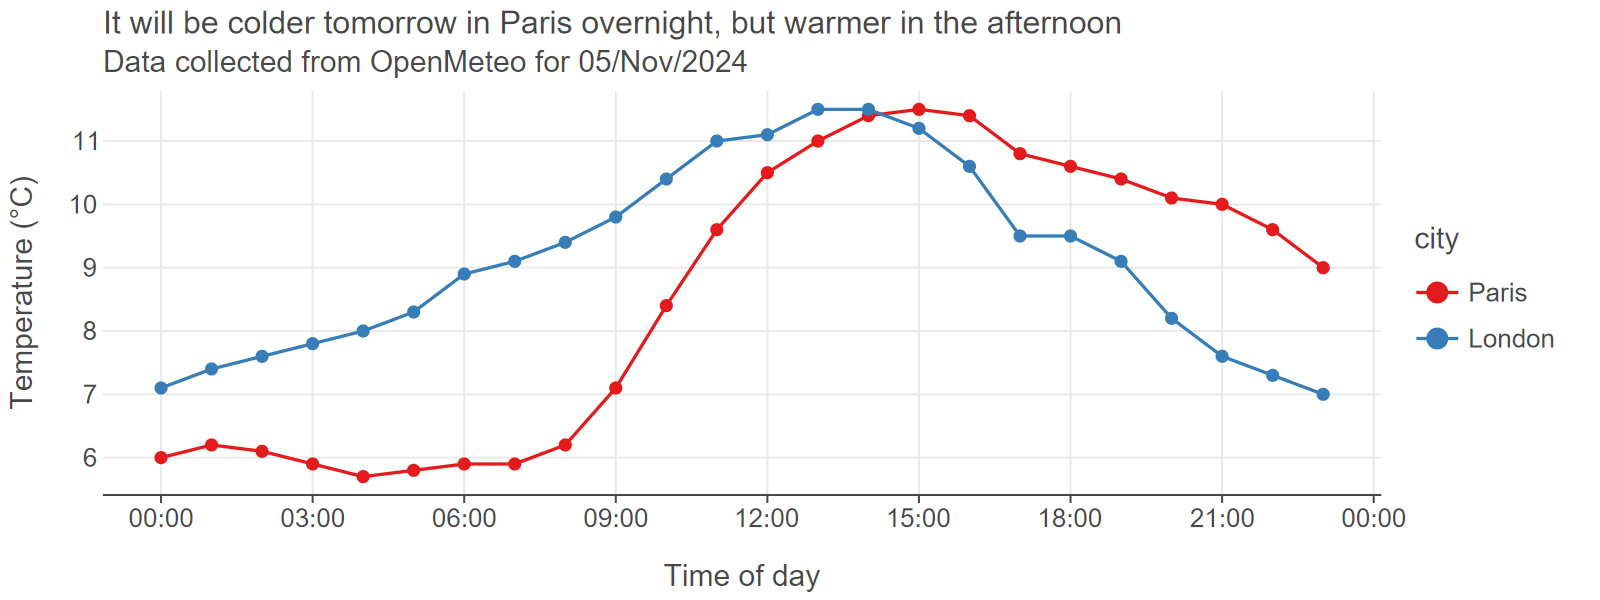

In [59]:
Image("../figures/weather/temperature_forecast.png")